In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


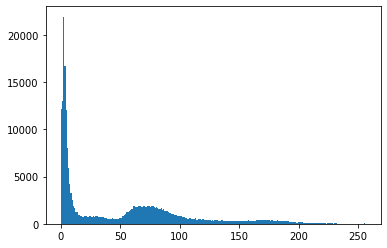

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Projects/ImageRegistration/Normalized-Cross Correlation/asset/BrainScan1.jpg')
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [2]:
img_gry = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


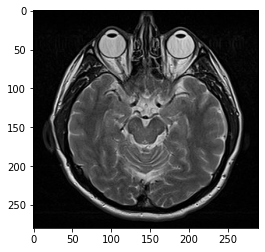

In [3]:
plt.imshow(img_gry,cmap='gray')

In [4]:
histogram1,bin_edges1 = np.histogram(img_gry,bins=256,range=(0,256))
histogram1,bin_edges1

(array([4050, 4327, 7316, 5574, 4017, 2681, 1973, 1394, 1092,  852,  642,
         546,  415,  410,  299,  313,  283,  262,  254,  269,  259,  271,
         237,  257,  267,  230,  247,  272,  240,  283,  283,  245,  229,
         225,  231,  238,  211,  217,  188,  186,  156,  178,  180,  199,
         152,  176,  175,  186,  160,  197,  215,  260,  278,  319,  346,
         404,  428,  459,  492,  534,  514,  624,  597,  580,  610,  631,
         618,  599,  606,  617,  621,  603,  615,  620,  646,  601,  630,
         615,  594,  554,  601,  558,  529,  531,  555,  504,  523,  446,
         441,  454,  432,  381,  388,  349,  355,  315,  294,  310,  267,
         271,  260,  259,  238,  248,  219,  218,  186,  187,  214,  178,
         173,  169,  181,  202,  144,  162,  168,  153,  151,  166,  137,
         136,  135,  120,  149,  127,  116,  128,  102,  117,  124,  129,
         115,  115,  106,  125,  106,  107,   96,  114,  108,   99,  113,
          90,   98,   90,  104,   92, 

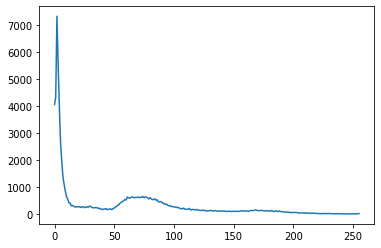

In [5]:
plt.plot(bin_edges1[0:-1],histogram1)
plt.show()

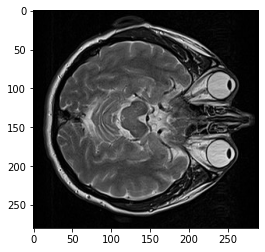

In [6]:
from scipy import ndimage

#rotation angle in degree
rotated = ndimage.rotate(img_gry, -90,reshape=False)
plt.imshow(rotated,cmap='gray')

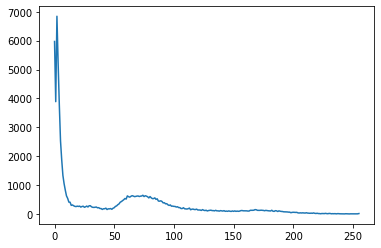

In [7]:
histogram2,bin_edges2 = np.histogram(rotated,bins=256,range=(0,256))
histogram2,bin_edges2
plt.plot(bin_edges2[0:-1],histogram2)

In [8]:
H, xedges, yedges = np.histogram2d(histogram1,histogram2,bins=200)

Text(0, 0.5, 'Counts')

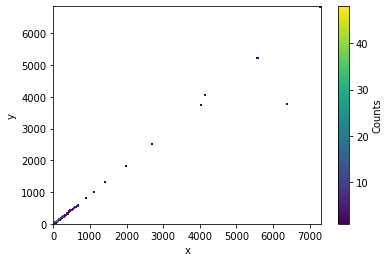

In [9]:
Hmasked = np.ma.masked_where(H==0,H)

fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

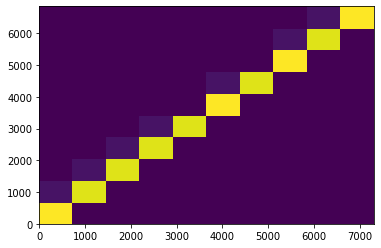

In [10]:
plt.hist2d(xedges,yedges)
plt.show()

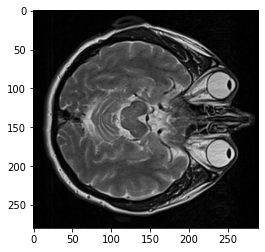

In [11]:
#Orb detector
orb_detector=cv2.ORB_create(5000)

kp1,d1 = orb_detector.detectAndCompute(img,None)
kp2,d2 = orb_detector.detectAndCompute(rotated,None)

matcher = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

matches = matcher.match(d1, d2)

matches=sorted(matches,key = lambda x: x.distance)
 
# Take the top 90 % matches forward.
matches = matches[:int(len(matches)*0.9)]
no_of_matches = len(matches)
 
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
 
for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt
 
# Find the homography matrix.
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
 
# Use this matrix to transform the
# colored image wrt the reference image.

height, width = rotated.shape
transformed_img = cv2.warpPerspective(img,
                    homography, (width, height))
 
# Save the output.
# cv2.imwrite('output.jpg', transformed_img)
plt.imshow(transformed_img)

In [36]:
import sys
img_gry_array = np.array(img_gry)
rot_array = np.array(rotated)

k=0
for i in range(len(img_gry_array)):
  mat = img_gry_array[i][k]
  for j in range(len(rot_array)):